#**Task4**:- *EDA CaseStudy*

#**Project Name :-** *BigMartDataset UsingPython*

#**Github Link :-**

#**Problem Statement:-**

The BigMart dataset contains information on product sales in a store, including features such as Item ID, Item Weight, Item Visibility, Item Type, Item MRP (Maximum Retail Price), Outlet ID, Outlet Type, Outlet Location, Outlet Size, and Item Outlet Sales. The task involves conducting exploratory data analysis (EDA) to understand sales trends and relationships between various features.

In [1]:
# Importing neccesary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**1.Reading and Inspection**

In [3]:
df = pd.read_csv('/content/drive/MyDrive/1. BigMart.csv')

In [4]:
df.head(5)

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df.tail(5)

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


**●  How many rows and columns are there in the dataset?**

In [8]:
# Check number of rows and columns in the dataset
num_rows, num_columns = df.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 8523
Number of columns: 12


 **● What are the different types of OutletTypes in the dataset, andhowmany records belong to each type?**

In [9]:
# Get unique OutletTypes and count of records for each type
outlet_types_count = df['OutletType'].value_counts()
print("Different types of OutletTypes and their count:")
print(outlet_types_count)

Different types of OutletTypes and their count:
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: OutletType, dtype: int64


**● What is the average Weight across all products?**

In [12]:
# Calculate average Weight
average_item_weight = df['Weight'].mean()
print("Average ItemWeight across all products:", average_item_weight)

Average ItemWeight across all products: 12.857645184135976


**● Plota histogram of Visibility to visualize its distribution.**

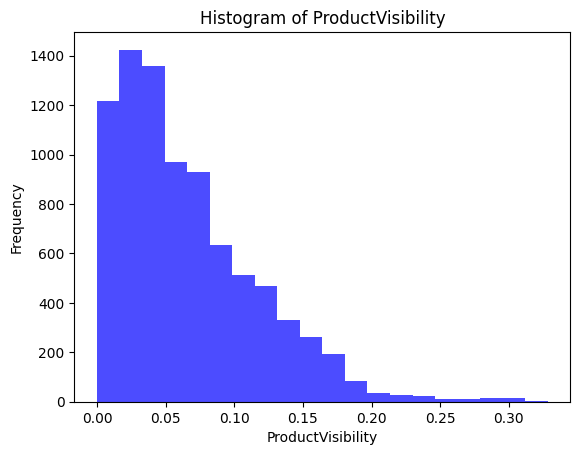

In [15]:
# Plot histogram of ProductVisibility
plt.hist(df['ProductVisibility'], bins=20, color='blue', alpha=0.7)
plt.xlabel('ProductVisibility')
plt.ylabel('Frequency')
plt.title('Histogram of ProductVisibility')
plt.show()

**● What is the average MRP (Maximum Retail Price) for each OutletType?**

In [17]:
# Calculate average MRP for each OutletType
average_item_mrp_by_outlet_type = df.groupby('OutletType')['MRP'].mean()
print("Average MRP for each OutletType:")
print(average_item_mrp_by_outlet_type)

Average MRP for each OutletType:
OutletType
Grocery Store        140.294688
Supermarket Type1    141.213894
Supermarket Type2    141.678634
Supermarket Type3    139.801791
Name: MRP, dtype: float64


**● Which OutletSize has the highest total OutletSales?**

In [18]:
# Find OutletSize with highest total ItemOutletSales
highest_total_sales_outlet_size = df.groupby('OutletSize')['OutletSales'].sum().idxmax()
print("OutletSize with highest total OutletSales:", highest_total_sales_outlet_size)

OutletSize with highest total OutletSales: Medium


**● Identify and list the top 5 most common productTypes.**

In [20]:
# Identify and list the top 5 most common ItemTypes
top_5_item_types = df['OutletType'].value_counts().head(5)
print("Top 5 most common OutletType:")
print(top_5_item_types)


Top 5 most common OutletType:
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: OutletType, dtype: int64


**● Plot a boxplot of OutletSales for each OutletSize to identify potential outliers.**

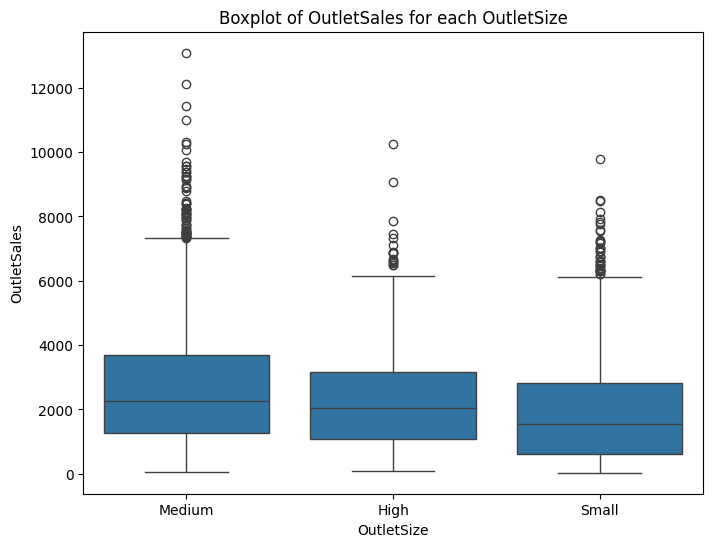

In [23]:
# Plot a boxplot of ItemOutletSales for each OutletSize
plt.figure(figsize=(8, 6))
sns.boxplot(x='OutletSize', y='OutletSales', data=df)
plt.title('Boxplot of OutletSales for each OutletSize')
plt.show()


**● Calculate the correlation between Weight and OutletSales.**

In [25]:
# Calculate correlation between Weight and OutletSales
correlation = df['Weight'].corr(df['OutletSales'])
print("Correlation between Weight and OutletSales:", correlation)

Correlation between Weight and OutletSales: 0.014122739280056456


**● Create a pivot table showing the average OutletSales for each Outlet Type and Location**

In [27]:
# Create a pivot table showing the average OutletSales for each OutletType and LocationType
pivot_table = pd.pivot_table(df, values='OutletSales', index='OutletType', columns='LocationType', aggfunc='mean')
print("Pivot table showing the average OutletSales for each OutletType and LocationType:")
print(pivot_table)

Pivot table showing the average OutletSales for each OutletType and LocationType:
LocationType            Tier 1       Tier 2       Tier 3
OutletType                                              
Grocery Store       340.329723          NaN   339.351662
Supermarket Type1  2313.099451  2323.990559  2298.995256
Supermarket Type2          NaN          NaN  1995.498739
Supermarket Type3          NaN          NaN  3694.038558


#**conclusion**

**1.The dataset has 8523 row and 12 columns**

**2.The average Weight across all products is 12.85764**

**3.OutletSize has the highest total OutletSales is Medium**

**4. The correlation between Weight and OutletSales is 0.01412**